Aurélien KOHL 20170211

# Business Analytics & Big Data
## Lab 4 : PySpark application



# Spark Environment setup

In [1]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null  
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz  

In [2]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [5]:
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("You_app_name")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [6]:
spark

# Drive Acces Config 

In [7]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [8]:
!ls /content/drive/My\ Drive/Data_Colab/Lab4/


AMAZON.csv  FACEBOOK.csv  MICROSOFT.csv  ZOOM.csv
APPLE.csv   GOOGLE.csv	  TESLA.csv


### Test

In [9]:
df = spark.read.options(header='True',inferSchema = True,delimiter=',').csv("/content/drive/My\ Drive/Data_Colab/Lab4/AMAZON.csv")

In [10]:
df.show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312|5830100|780.4500122070312|      AMAZON|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375|5986200| 795.989990234375|      AMAZON|
|2017-01-09|  801.77001953125|  791.77001953125|            798.0|796.9199829101562|3446100|796.9199829101562|      AMAZON|
|2017-01

# Read A CSV Funtion

##  Implementation

In [11]:
from pyspark.sql.types import *
##from pyspark.sql.types import StructField,TimestampType,FloatType,StructType,IntergreType

In [12]:
def read_disp_info_PreSetSchema(Path):


  if Path.find(".csv")>0:
    ##print("Chargement du schema")
    devColumns = [StructField("Date",DateType()), StructField("High",FloatType()), StructField("Low",FloatType()),StructField("Open",FloatType()),StructField("Close",FloatType()),StructField("Volume",IntegerType()),StructField("Adj Close",FloatType()),StructField("company_name",StringType())]
    devSchema = StructType(devColumns)
    ##print("We detect a csv path")
    df = spark.read.options(header='True',delimiter=',').schema(devSchema).csv(Path)
    
    ##df.printSchema()
    ##df.show()
    return df
  else :
    print("Not a valid path")
    return None
  

In [13]:
def read_disp_info_AutoSchema(Path):
  if Path.find(".csv")>0:
    df = spark.read.options(header='True',inferSchema = True,delimiter=',').csv(Path)
    from datetime import datetime
    from pyspark.sql.functions import udf, month, dayofweek,col
    from pyspark.sql.types import DateType

    # Setting a user defined function:
    # This function converts the string cell into a date:
    func =  udf (lambda x: datetime.strptime(x, '%Y-%m-%d'), DateType())
    df = df.withColumn('Date', func(col('Date')))
    return df
  else :
    print("Not a valid path")
    return None

## Recuperation des Fichier csv avec notre fonction

In [14]:
PathList = ["/content/drive/My\ Drive/Data_Colab/Lab4/AMAZON.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/FACEBOOK.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/MICROSOFT.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/ZOOM.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/APPLE.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/GOOGLE.csv",
            "/content/drive/My\ Drive/Data_Colab/Lab4/TESLA.csv"]

/content/drive/My\ Drive/Data_Colab/Lab4/

In [15]:
df_AMAZON =  read_disp_info_AutoSchema(PathList[0])
df_FACEBOOK =  read_disp_info_AutoSchema(PathList[1])
df_MICROSOFT =  read_disp_info_AutoSchema(PathList[2])
df_ZOOM =  read_disp_info_AutoSchema(PathList[3])
df_APPLE =  read_disp_info_AutoSchema(PathList[4])
df_GOOGLE =  read_disp_info_AutoSchema(PathList[5])
df_TESLA =  read_disp_info_AutoSchema(PathList[6])

In [16]:
df_AMAZON.show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312|5830100|780.4500122070312|      AMAZON|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375|5986200| 795.989990234375|      AMAZON|
|2017-01-09|  801.77001953125|  791.77001953125|            798.0|796.9199829101562|3446100|796.9199829101562|      AMAZON|
|2017-01

In [17]:
df_AMAZON.printSchema()

root
 |-- Date: date (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- company_name: string (nullable = true)



# Show the first and last 40 rows of each stock price

## implementation

In [18]:
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import desc

def Show40(DF):
  print("Here is the First 40 ROw of the dataframe")
  DF.show(40)
  print("Here is the Last 40 ROw of the dataframe")
  DF = df_AMAZON.withColumn("index", monotonically_increasing_id())
  DF.orderBy(desc("index")).drop("index").show(40)
  

  return None

## Test

In [19]:
Show40(df_AMAZON)

Here is the First 40 ROw of the dataframe
+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+
|      Date|             High|              Low|             Open|            Close|  Volume|        Adj Close|company_name|
+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562| 3521100|753.6699829101562|      AMAZON|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812| 2510500|757.1799926757812|      AMAZON|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312| 5830100|780.4500122070312|      AMAZON|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375| 5986200| 795.989990234375|      AMAZON|
|2017-01-09|  801.77001953125|  791.77001953125|            798.0|796.9199829101562

# Function to Get the number of observations


## implementation

In [20]:
def NumberObservation(DF):

  return   DF.count()

## TEst

In [21]:
NumberObservation(df_AMAZON)

987

# Deduce programmatically what is the period

## implementation

In [22]:
from pyspark.sql.functions import *

def DetectPeriod(DF):
  FirstDate = DF.collect()[0][0]
  NextDate = DF.collect()[1][0]
  ##print(FirstDate)
  ##print(NextDate)
  difference = NextDate - FirstDate
  ##print(difference)
  return print(difference)

## Test

In [23]:
DetectPeriod(df_FACEBOOK)

1 day, 0:00:00


# Descriptive statistics for each dataframe and each column (min, max, standard deviation)

## Implementation

In [24]:
def Showstatistics(DF):
  DF.describe().show()
  return None

## Test

In [25]:
Showstatistics(df_AMAZON)

+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|summary|              High|               Low|             Open|             Close|           Volume|         Adj Close|company_name|
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|  count|               987|               987|              987|               987|              987|               987|         987|
|   mean|1762.0071216958152|1722.1011452099956|1743.433881363487|1742.9566644206718| 4509728.05775076|1742.9566644206718|        null|
| stddev| 667.2385315752688| 644.7988093382758|657.1153070927137| 655.9576061129322|2179817.628631287| 655.9576061129322|        null|
|    min|  758.760009765625| 747.7000122070312|757.9199829101562| 753.6699829101562|           881300| 753.6699829101562|      AMAZON|
|    max|           3552.25|  3486.68994140625|        

# Number of missing values for each dataframe and column


##  implementation with Pandas

In [26]:
import pyspark.sql.functions as F
def CountMissings(spark_df):

    df_pandas = spark_df.toPandas()
    

    return df_pandas.isnull().sum(axis = 0)



In [27]:
CountMissings(df_TESLA)

Date            0
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

##  implementation with Spark

In [28]:


import pyspark.sql.functions as F
def CountMissings(DF):

    Dict_Null = {col:DF.filter(DF[col].isNull()).count() for col in DF.columns}

    return Dict_Null


## Test

In [29]:
CountMissings(df_ZOOM)

{'Adj Close': 0,
 'Close': 0,
 'Date': 0,
 'High': 0,
 'Low': 0,
 'Open': 0,
 'Volume': 0,
 'company_name': 0}

# Correlation between values of One DF

## Implementation

In [30]:


def CorrelationBetweenTwoCollumn(DF,coll1,coll2):
  print(DF.stat.corr(coll1, coll2))
  return None

## Test

In [31]:
CorrelationBetweenTwoCollumn(df_AMAZON,"High","Volume")

0.16053643475451043


# Correlation between values of two DF

## Implementation

In [32]:
def CorrelationBetweenTwoDataframe(DF1,DF2,coll):
  df1PANDAS = DF1.toPandas()
  df2PANDAS = DF2.toPandas()
  column_1 = df1PANDAS[coll]
  column_2 = df2PANDAS[coll]
  correlation = column_1.corr(column_2)
  print(correlation)
  return None

## Test

In [33]:
CorrelationBetweenTwoDataframe(df_AMAZON,df_APPLE,"High")

0.9297874259390854


The exploration process involves answering some questions about the data you have in order to gain a good understanding of it, the questions should be technical and business in the same time. Some examples of the question you could try to answer using spark and koalas are :


# What is the average of the opening and closing prices for each stock price and for different time periods (week, month, year)


## Implementation

In [34]:
import pandas as pd
def ChangeSizeSample(DF1,period):
  DF1_PD=DF1.toPandas()
  DF1_PD['Date']= pd.to_datetime(DF1_PD['Date'])
  DF1_PD.set_index('Date', inplace=True)
  DF1_PD_Resample = DF1_PD.resample(period).mean()

  return DF1_PD_Resample




## Test

In [35]:
ChangeSizeSample(df_AMAZON,"1D")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100.0,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500.0,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100.0,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200.0,795.989990
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-11-28,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,3228.389893,3125.550049,3208.479980,3168.040039,4063900.0,3168.040039


In [36]:
ChangeSizeSample(df_AMAZON,"1M")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,810.826505,799.345004,804.972998,807.505002,3.530700e+06,807.505002
2017-02-28,839.052102,829.609998,833.583162,835.745268,3.776226e+06,835.745268
2017-03-31,857.560871,849.321740,853.041740,854.240001,2.639596e+06,854.240001
2017-04-30,910.524735,898.467896,904.890529,903.385790,3.870511e+06,903.385790
2017-05-31,966.449546,955.042725,960.274092,961.719546,3.463727e+06,961.719546
2017-06-30,999.854087,980.792730,995.042272,990.444089,4.369791e+06,990.444089
2017-07-31,1016.374994,999.383005,1007.654501,1008.483997,3.940620e+06,1008.483997
2017-08-31,978.453916,964.747394,973.247827,971.436523,3.364861e+06,971.436523
2017-09-30,975.801501,963.272495,971.953000,968.992499,2.964590e+06,968.992499


In [37]:
ChangeSizeSample(df_TESLA,"1Y")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,63.690119,61.937394,62.859243,62.863259,3.167393e+07,62.863259
2018-12-31,64.738725,62.110462,63.436693,63.461984,4.306053e+07,63.461984
2019-12-31,55.529960,53.722508,54.605627,54.706040,4.579461e+07,54.706040
2020-12-31,266.657760,251.458232,259.250524,259.502309,6.576330e+07,259.502309


# Based on the opening and closing price, calculate the daily return of each stock.


### Implementation with pandas


In [38]:
import pandas as pd
def DailyReturn(DF1):
  DF1_PD=DF1.toPandas()
  DF1_PD['Date']= pd.to_datetime(DF1_PD['Date'])
  DF1_PD.set_index('Date', inplace=True)
  DF1_PD['Daily Return']=DF1_PD['Close']-DF1_PD['Open']
  DF1_PD_Resample = DF1_PD.drop(columns=['High', 'Low','Open','Close','Volume','Adj Close','company_name'])
  return DF1_PD_Resample




### Test

In [39]:
DailyReturn(df_AMAZON)

,Daily Return
Date,
2017-01-03,-4.250000
2017-01-04,-1.210022
2017-01-05,18.900024
2017-01-06,13.630005
2017-01-09,-1.080017
...,...
2020-11-25,43.199951
2020-11-27,-15.919922
2020-11-30,-40.439941


### Based on the opening and closing price, calculate the daily return of each stock. with spark

In [40]:

def DailyReturn3(DF1): 
  from pyspark.sql.functions import log 

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  return DF1 


In [41]:
DailyReturn3(df_AMAZON).show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+--------------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|              Return|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+--------------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON| -0.5623232880753688|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON| -0.1596788302633787|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312|5830100|780.4500122070312|      AMAZON|   2.451487801311768|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375|5986200| 795.989990234375|      AMAZON|  1.727

# What are the stocks with the highest daily return

In [326]:
def DailyReturnMean(DF1): 
  from pyspark.sql.functions import log 

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  DF1 = DF1.agg({'Return': 'mean'})
  return DF1 


In [335]:
DailyReturnMean(df_AMAZON).collect()[0][0]

-0.013101247129285449

### Calculate the average daily return for different periods (week, month, and year)


In [324]:

def AVGDailyReturnWeek(DF1): 
  from pyspark.sql.functions import log,udf, month, dayofweek,col,weekofyear

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  Result = DF1.groupBy((year('Date').alias('year')),(month('Date').alias('month')),(weekofyear('Date').alias('week'))).agg({'Return': 'mean'}).orderBy('avg(Return)').collect() 
  return Result



In [325]:
AVGDailyReturnWeek(df_AMAZON)


[Row(year=2018, month=2, week=5, avg(Return)=-3.5721578650009356),
 Row(year=2017, month=7, week=31, avg(Return)=-3.116605720625718),
 Row(year=2018, month=12, week=51, avg(Return)=-2.6144212064748786),
 Row(year=2020, month=5, week=18, avg(Return)=-2.196141286697275),
 Row(year=2018, month=4, week=17, avg(Return)=-1.6846027305155495),
 Row(year=2018, month=7, week=31, avg(Return)=-1.5879756517149852),
 Row(year=2020, month=7, week=29, avg(Return)=-1.5488442243759475),
 Row(year=2020, month=9, week=38, avg(Return)=-1.487165491067166),
 Row(year=2018, month=10, week=40, avg(Return)=-1.4663095944749487),
 Row(year=2018, month=10, week=41, avg(Return)=-1.3978885946928161),
 Row(year=2020, month=11, week=49, avg(Return)=-1.2684186193928426),
 Row(year=2020, month=9, week=37, avg(Return)=-1.1967934248843337),
 Row(year=2018, month=2, week=6, avg(Return)=-1.1085810676260646),
 Row(year=2018, month=11, week=46, avg(Return)=-1.1069445276577867),
 Row(year=2018, month=12, week=49, avg(Return)=-

In [316]:
def AVGDailyReturnMonth(DF1): 
  from pyspark.sql.functions import log,udf, month, dayofweek,col

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  Result = DF1.groupBy((year('Date').alias('year')),(month('Date').alias('month'))).agg({'Return': 'mean'}).orderBy('avg(Return)').collect() 
  return Result

In [317]:
AVGDailyReturnMonth(df_AMAZON)

[Row(year=2018, month=10, avg(Return)=-0.9635129574279518),
 Row(year=2018, month=12, avg(Return)=-0.828048083462616),
 Row(year=2020, month=9, avg(Return)=-0.6067033303363422),
 Row(year=2018, month=4, avg(Return)=-0.49574697199354023),
 Row(year=2017, month=6, avg(Return)=-0.46241572780318835),
 Row(year=2020, month=10, avg(Return)=-0.3396172962266853),
 Row(year=2018, month=2, avg(Return)=-0.3337179105379381),
 Row(year=2019, month=8, avg(Return)=-0.32109671668354783),
 Row(year=2017, month=9, avg(Return)=-0.3063653993381577),
 Row(year=2017, month=8, avg(Return)=-0.18376339247431744),
 Row(year=2020, month=11, avg(Return)=-0.17769454039781457),
 Row(year=2017, month=12, avg(Return)=-0.17279317300570696),
 Row(year=2017, month=4, avg(Return)=-0.16099496713296796),
 Row(year=2018, month=9, avg(Return)=-0.1583248855962016),
 Row(year=2019, month=9, avg(Return)=-0.14775386778290128),
 Row(year=2019, month=5, avg(Return)=-0.12582612379543667),
 Row(year=2018, month=3, avg(Return)=-0.104

In [46]:
def AVGDailyReturnYear(DF1): 
  from pyspark.sql.functions import log,udf, month, dayofweek,col,year

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  Result = DF1.groupBy((year('Date').alias('year'))).agg({'Return': 'mean'}).orderBy('avg(Return)').collect() 
  return Result

In [47]:
AVGDailyReturnYear(df_AMAZON)

[Row(year=2018, avg(Return)=-0.12764646311868605),
 Row(year=2017, avg(Return)=-0.0032657153671099034),
 Row(year=2019, avg(Return)=0.030672767419719783),
 Row(year=2020, avg(Return)=0.05235402786935909)]

### How do the stock prices change day to day and month to month (may be you can create new columns to save those calculations)

In [359]:
df = spark.read.options(header='True',inferSchema = True,delimiter=',').csv("/content/drive/My\ Drive/Data_Colab/Lab4/AMAZON.csv")

In [360]:
def AddDayChangeCollumn(DF1): 
  from pyspark.sql.functions import lag,col
  from pyspark.sql.window import Window

  ## https://stackoverflow.com/questions/34295642/spark-add-new-column-to-dataframe-with-value-from-previous-row

  w = Window().partitionBy().orderBy(col("Date"))

  df = DF1.withColumn("prevClose", lag("Close", 1, 0).over(w))
  df = df.withColumn("%1d",((df.Close/df.prevClose)-1)*100 )

  return df


In [361]:
test = AddDayChangeCollumn(df_AMAZON)

In [362]:
test.show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-----------------+--------------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|        prevClose|                 %1d|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-----------------+--------------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON|              0.0|                null|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON|753.6699829101562| 0.46572237785984516|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312|5830100|780.4500122070312|      AMAZON|757.1799926757812|   3.073248072630208|
|2017-01-06|799.440002

In [363]:
def Add7DayChangeCollumn(DF1): 
  from pyspark.sql.functions import lag,col
  from pyspark.sql.window import Window

  ## https://stackoverflow.com/questions/34295642/spark-add-new-column-to-dataframe-with-value-from-previous-row

  w = Window().partitionBy().orderBy(col("Date"))

  df = DF1.withColumn("prevClose1w", lag("Close", 5, 0).over(w))
  df = df.withColumn("%7d",((df.Close/df.prevClose1w)-1)*100 )

  return df

In [364]:
test = Add7DayChangeCollumn(test)

In [365]:
test.show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-----------------+--------------------+-----------------+-------------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|        prevClose|                 %1d|      prevClose1w|                %7d|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-----------------+--------------------+-----------------+-------------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON|              0.0|                null|              0.0|               null|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON|753.6699829101562| 0.46572237785984516|              0.0|               n

In [366]:
def Add1MonthChangeCollumn(DF1): 
  from pyspark.sql.functions import lag,col
  from pyspark.sql.window import Window

  ## https://stackoverflow.com/questions/34295642/spark-add-new-column-to-dataframe-with-value-from-previous-row

  w = Window().partitionBy().orderBy(col("Date"))

  df = DF1.withColumn("prevClose22", lag("Close", 22, 0).over(w))
  df = df.withColumn("%1M",((df.Close/df.prevClose22)-1)*100 )

  return df

In [367]:
test = Add1MonthChangeCollumn(test)

In [368]:
test.show(50)

+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+-----------------+--------------------+-----------------+--------------------+-----------------+------------------+
|      Date|             High|              Low|             Open|            Close|  Volume|        Adj Close|company_name|        prevClose|                 %1d|      prevClose1w|                 %7d|      prevClose22|               %1M|
+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+-----------------+--------------------+-----------------+--------------------+-----------------+------------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562| 3521100|753.6699829101562|      AMAZON|              0.0|                null|              0.0|                null|              0.0|              null|
|2017-01-04|759.6799926757812|754.200012

In [58]:
from pyspark.sql.functions import lag,col,date_sub
df = df.withColumn("prevWeekClose", date_sub(df['Date'], 7))


In [59]:
df.show()

+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-------------+
|      Date|             High|              Low|             Open|            Close| Volume|        Adj Close|company_name|prevWeekClose|
+----------+-----------------+-----------------+-----------------+-----------------+-------+-----------------+------------+-------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100|753.6699829101562|      AMAZON|   2016-12-27|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500|757.1799926757812|      AMAZON|   2016-12-28|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312|5830100|780.4500122070312|      AMAZON|   2016-12-29|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375|5986200| 795.989990234375|      AMAZON|   2016-12-30|
|2017-01-09|  801.77001953125|  79

In [60]:


df.filter(df.Date == "2017-01-31").first()['Close']


823.47998046875

In [61]:
##df = df.withColumn("prevWeekClosePrice", (df.filter(df.Date == df.prevWeekClose ).first()['Close']) ) 

# Moving average :

The moving average is calculated by adding a stock's prices over a certain
period and dividing the sum by the total number of periods. For example, if you want to
calculate the moving average for the opening price of the stock ABC. You look at the opening
price over five periods and calculate the average. For example if the opening price over the
past five days were 25.40, 25.90. 26.50, 26.30 and 27.90. Then, the moving average of the
opening price of the last day is 26.40. Code a function that take as input a dataframe, a
column name, the number of points to consider for the moving average (5 in the example)
and add a new column to the dataframe with the values of calculated moving average


In [62]:


##https://kevinvecmanis.io/pyspark/data%20science/python/2019/06/02/SPX-Analysis-With-PySpark.html
def MovingAvg(DF1,Lag,Column):
  from pyspark.sql.window import Window
  from pyspark.sql.functions import log,avg
  initLag = Lag
  Lag = -Lag

  # Create a window between today and 50 days ago.
  windowSpec = Window.orderBy(col("Date")).rowsBetween(Lag, 0)

  # Calculate new moving average column using 'avg' and the windowSpec
  df = DF1.withColumn(f"{initLag}DMA", avg(Column).over(windowSpec)) 

  deviation = log(col(Column)/col(f'{initLag}DMA'))*100
  df = df.withColumn(f"{initLag}_DMA_DEV", deviation)
  df.select(['Date',Column,f'{initLag}DMA',f'{initLag}_DMA_DEV']).show()


  df.orderBy(df[f"{initLag}_DMA_DEV"].desc()).head(1)[0].asDict()

  return df


In [63]:
MovingAvg(df,50,'Close')

+----------+-----------------+-----------------+-------------------+
|      Date|            Close|            50DMA|         50_DMA_DEV|
+----------+-----------------+-----------------+-------------------+
|2017-01-03|753.6699829101562|753.6699829101562|                0.0|
|2017-01-04|757.1799926757812|755.4249877929688|0.23205075918648913|
|2017-01-05|780.4500122070312|763.7666625976562| 2.1608364975808385|
|2017-01-06| 795.989990234375|771.8224945068359| 3.0832016491202747|
|2017-01-09|796.9199829101562|   776.8419921875| 2.5517302465838703|
|2017-01-10|795.9000244140625|780.0183308919271| 2.0156159935603424|
|2017-01-11|  799.02001953125|782.7328578404018| 2.0594541135852285|
|2017-01-12|813.6400146484375|786.5962524414062|  3.380293000093172|
|2017-01-13|817.1400146484375| 789.990003797743|  3.379016477495949|
|2017-01-17| 809.719970703125|791.9630004882813| 2.2173798543913956|
|2017-01-18|  807.47998046875|793.3736350319602| 1.7623985632756078|
|2017-01-19|809.0399780273438|794.

DataFrame[Date: string, High: double, Low: double, Open: double, Close: double, Volume: int, Adj Close: double, company_name: string, prevWeekClose: date, 50DMA: double, 50_DMA_DEV: double]

## Moving average ploting

In [64]:
def MovingAvgPlot(df):
  import matplotlib.pyplot as plt
  df = df.toPandas()
  df["SMA1"] = df['Close'].rolling(window=50).mean()
  df["SMA2"] = df['Close'].rolling(window=200).mean()
  plt.figure(figsize=(10,10))
  plt.plot(df['SMA1'], 'g--', label="SMA1")
  plt.plot(df['SMA2'], 'r--', label="SMA2")
  plt.plot(df['Close'], label="close")
  plt.legend()
  plt.show()
   

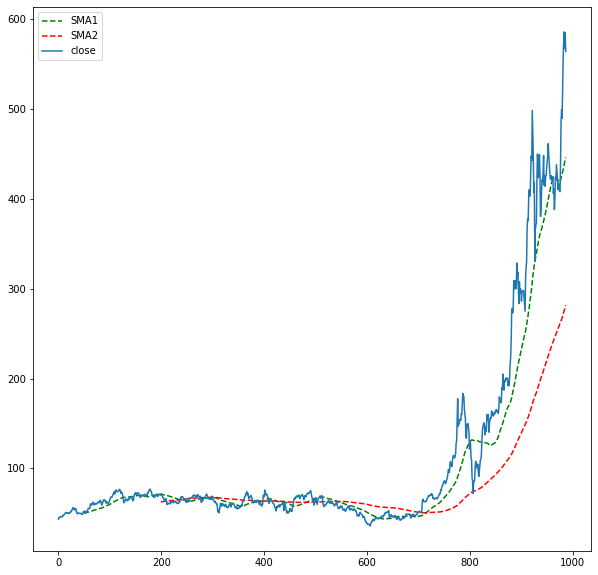

In [65]:
MovingAvgPlot(df_TESLA)

# Correlation : 

 Is there any correlation between the different stocks you have ? Code a
function that takes as input the values of two stocks (you should decide what is the data
type that will handle the values) and calculate the correlation between them


In [66]:
from pandas.plotting import scatter_matrix
##https://levelup.gitconnected.com/stock-market-analysis-using-python-pandas-ec278f76e217
def Scatter_Matrix(DF1,DF2,Column):
  DF1 = DF1.toPandas()
  DF2 = DF2.toPandas()
  global_df=pd.concat([DF1[Column],DF2[Column]],axis = 1)
  global_df.columns = ['DF1 Open','DF2 Open']
  scatter_matrix(global_df, figsize=(16,5))


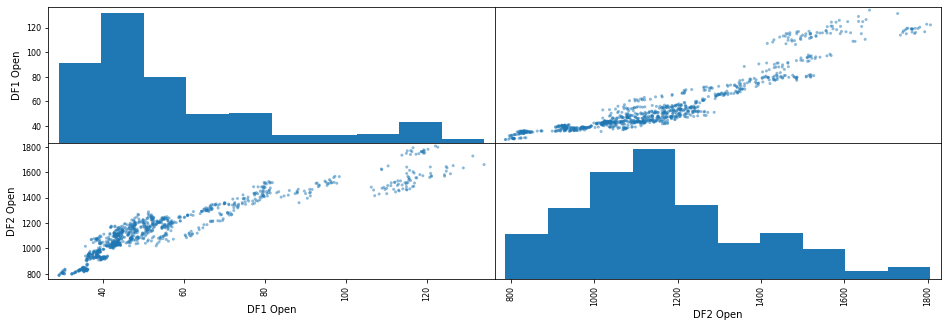

In [67]:
Scatter_Matrix(df_APPLE,df_GOOGLE,'Close'  )

# When investing in stocks, the return rate is very important. Code a function that calculates the return rate of the stock in different periods (week, month and year) 

In [68]:
def DaylyRateReturn(DF1):
  DF1_PD_Resample = ChangeSizeSample(DF1,"D")
  DF1_PD_Resized = DF1_PD_Resample.drop(columns=['High', 'Low','Open','Close','Volume'])
  Return = DF1_PD_Resized.pct_change()*100

  return Return

def WeeklyRateReturn(DF1):
  DF1_PD_Resample = ChangeSizeSample(DF1,"W")
  DF1_PD_Resized = DF1_PD_Resample.drop(columns=['High', 'Low','Open','Close','Volume'])
  Return = DF1_PD_Resized.pct_change()*100

  return Return

def MonthlyRateReturn(DF1):
  DF1_PD_Resample = ChangeSizeSample(DF1,"M")
  DF1_PD_Resized = DF1_PD_Resample.drop(columns=['High', 'Low','Open','Close','Volume'])
  Return = DF1_PD_Resized.pct_change()*100 
  return Return

def YearlyRateReturn(DF1):
  DF1_PD_Resample = ChangeSizeSample(DF1,"Y")
  DF1_PD_Resized = DF1_PD_Resample.drop(columns=['High', 'Low','Open','Close','Volume'])
  Return = DF1_PD_Resized.pct_change()*100 
  return Return

In [69]:
DaylyRateReturn(df_AMAZON)

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,0.465722
2017-01-05,3.073248
2017-01-06,1.991156
2017-01-07,0.000000
...,...
2020-11-28,0.000000
2020-11-29,0.000000
2020-11-30,-0.854371


# Given a specific month, what is the stock with the best return rate. Code a function that takes as input a start date and a period (month, year), calculate the return rate for each stock and return the one with the best return rate.

In [70]:
def AVGDailyReturnYearMont(DF1): 
  from pyspark.sql.functions import log,udf, month, dayofweek,col,year

  DF1 = DF1.withColumn("Return", log(DF1["Close"]/DF1["Open"]) * 100)
  Result = DF1.groupBy((year('Date').alias('year')),(month('Date').alias('month')),"company_name").agg({'Return': 'mean'}).orderBy('avg(Return)') 
  return Result

In [71]:
AVGDailyReturnYearMont(df_AMAZON).show()

+----+-----+------------+--------------------+
|year|month|company_name|         avg(Return)|
+----+-----+------------+--------------------+
|2018|   10|      AMAZON| -0.9635129574279518|
|2018|   12|      AMAZON|  -0.828048083462616|
|2020|    9|      AMAZON| -0.6067033303363422|
|2018|    4|      AMAZON|-0.49574697199354023|
|2017|    6|      AMAZON|-0.46241572780318835|
|2020|   10|      AMAZON| -0.3396172962266853|
|2018|    2|      AMAZON| -0.3337179105379381|
|2019|    8|      AMAZON|-0.32109671668354783|
|2017|    9|      AMAZON| -0.3063653993381577|
|2017|    8|      AMAZON|-0.18376339247431744|
|2020|   11|      AMAZON|-0.17769454039781457|
|2017|   12|      AMAZON|-0.17279317300570696|
|2017|    4|      AMAZON|-0.16099496713296796|
|2018|    9|      AMAZON| -0.1583248855962016|
|2019|    9|      AMAZON|-0.14775386778290128|
|2019|    5|      AMAZON|-0.12582612379543667|
|2018|    3|      AMAZON|-0.10489987656502718|
|2020|    1|      AMAZON|-0.08701788063193099|
|2018|    7| 

In [72]:
def BESTAVGDailyReturnYearMont(YEAR,MONTH): 
  DFInit = AVGDailyReturnYearMont(df_AMAZON)
  DFInit = DFInit.filter(DFInit.year == YEAR).filter(DFInit.month == MONTH)
  DFList = [df_FACEBOOK,df_MICROSOFT,df_ZOOM,df_APPLE,df_GOOGLE, df_TESLA ]
  for x in DFList:
    DFtemp = AVGDailyReturnYearMont(x)
    DFtemp = DFtemp.filter(DFtemp.year == YEAR).filter(DFtemp.month == MONTH)
    DFInit = DFInit.union(DFtemp)
  DFInit = DFInit.orderBy(col('avg(Return)').desc())
  return DFInit

In [73]:
BESTAVGDailyReturnYearMont("2020","2").show()

+----+-----+------------+--------------------+
|year|month|company_name|         avg(Return)|
+----+-----+------------+--------------------+
|2020|    2|        ZOOM|  0.4910774808401584|
|2020|    2|       TESLA| 0.47967622538535587|
|2020|    2|       APPLE|  0.3302774554118378|
|2020|    2|    FACEBOOK| 0.23785507560960698|
|2020|    2|   MICROSOFT| 0.11413666957866615|
|2020|    2|      GOOGLE| 0.09205493280124162|
|2020|    2|      AMAZON|0.024528855596053785|
+----+-----+------------+--------------------+



# ============================================================================================================================================

# 8 insights that can be helpful for our use case

## What is the biggest intrady price swing?

In [255]:
def BiggestSwingIntraday(df):

  swing_formula = 100 * (col('High') - col('Low')) / col('Close')
  df = df.withColumn("Swing", swing_formula)

  # To display our new column with the inputs...
  df =df.select(['High','Low','Close','Swing','Date'])
  
  return df.orderBy(df["Swing"].desc()).head(1)[0].asDict()

In [256]:
df =df_AMAZON

In [257]:
BiggestSwingIntraday(df)

{'Close': 1538.8800048828125,
 'Date': datetime.date(2018, 10, 29),
 'High': 1665.739990234375,
 'Low': 1495.0,
 'Swing': 11.095081467861235}

## What is the most that the stocks has ever exceeded its 50-day moving average?

In [249]:
def MostExededMA50(d):
  d = MovingAvg(d,50,'Close')
  return  d.orderBy(d["50_DMA_DEV"].desc()).head(1)[0].asDict()

In [250]:
df =df_AMAZON

In [251]:

MostExededMA50(df)

+----------+-----------------+-----------------+-------------------+
|      Date|            Close|            50DMA|         50_DMA_DEV|
+----------+-----------------+-----------------+-------------------+
|2017-01-03|753.6699829101562|753.6699829101562|                0.0|
|2017-01-04|757.1799926757812|755.4249877929688|0.23205075918648913|
|2017-01-05|780.4500122070312|763.7666625976562| 2.1608364975808385|
|2017-01-06| 795.989990234375|771.8224945068359| 3.0832016491202747|
|2017-01-09|796.9199829101562|   776.8419921875| 2.5517302465838703|
|2017-01-10|795.9000244140625|780.0183308919271| 2.0156159935603424|
|2017-01-11|  799.02001953125|782.7328578404018| 2.0594541135852285|
|2017-01-12|813.6400146484375|786.5962524414062|  3.380293000093172|
|2017-01-13|817.1400146484375| 789.990003797743|  3.379016477495949|
|2017-01-17| 809.719970703125|791.9630004882813| 2.2173798543913956|
|2017-01-18|  807.47998046875|793.3736350319602| 1.7623985632756078|
|2017-01-19|809.0399780273438|794.

{'50DMA': 2561.4190314797793,
 '50_DMA_DEV': 21.714644809313988,
 'Adj Close': 3182.6298828125,
 'Close': 3182.6298828125,
 'Date': datetime.date(2020, 7, 9),
 'High': 3193.8798828125,
 'Low': 3074.0,
 'Open': 3115.989990234375,
 'Volume': 6388700,
 'company_name': 'AMAZON'}

We can see that the most the AMAZON’s closing price has moved from the 50-Day moving average (to the upside) is  21.714644809313988 %.

## What is the most active month for trading volumes?

In [229]:
df = df_AMAZON

In [284]:
def MostActiveTradingVolumeMonth(d):
  return  df.groupBy( (month('Date').alias('month')) ).agg({'Volume': 'mean'}).orderBy('avg(Volume)')

In [285]:
MostActiveTradingVolumeMonth(df).show()

+-----+------------------+
|month|       avg(Volume)|
+-----+------------------+
|    8|3789522.4719101125|
|    5|3821508.1395348837|
|    6|4054312.9411764704|
|    9|         4135512.5|
|   11| 4382215.853658536|
|    7|  4435607.05882353|
|   12| 4619017.629032258|
|    1| 4646809.638554217|
|    4| 4992498.780487805|
|   10| 5035085.555555556|
|    2| 5039467.105263158|
|    3| 5238529.885057472|
+-----+------------------+



Here we can see mars has the highest average number of amazon equity traded

## What is the most active day for trading volumes?

In [342]:
df = df_AMAZON

In [343]:
def MostActiveTradingVolumeDay(d):
  return  df.groupBy( (dayofweek('Date').alias('day')) ).agg({'Volume': 'mean'}).orderBy('avg(Volume)')

In [344]:
MostActiveTradingVolumeDay(df).show()

+---+-----------------+
|day|      avg(Volume)|
+---+-----------------+
|  4|4223766.631840796|
|  3|4275513.861386139|
|  2|4555258.064516129|
|  5|4618542.211055276|
|  6|4884938.693467337|
+---+-----------------+



dayofweek() function extracts day of a week by taking date as input. Day of week ranges from 1 to 7. (1- Sunday , 2- Monday …… 7- Saturday)

le jour le plus actif en volume est le vendredi

## What is the most active week for trading volumes?

In [347]:
def MostActiveTradingVolumeWeek(d):
  return  df.groupBy( (weekofyear('Date').alias('week')) ).agg({'Volume': 'mean'}).orderBy('avg(Volume)')

In [348]:
MostActiveTradingVolumeWeek(df).show()

+----+------------------+
|week|       avg(Volume)|
+----+------------------+
|  34|         3317395.0|
|  27|        3411206.25|
|  21|         3476335.0|
|  22|         3575387.5|
|  25|         3658225.0|
|  15| 3689627.777777778|
|  19|         3722070.0|
|  37|3764236.8421052634|
|  33|         3790735.0|
|  35|         3792450.0|
|  47|3800944.4444444445|
|   8|         3889862.5|
|  26|         3939780.0|
|  20|         3947555.0|
|  50|4005426.6666666665|
|  40|         4050030.0|
|  28|         4065000.0|
|  32|         4066970.0|
|  23|         4068120.0|
|  38|         4163950.0|
+----+------------------+
only showing top 20 rows



la semaine la plus active en moyenne a lieu du lundi 19 – dimanche 25 septembre 2022

# What was the lowest daily return

In [305]:
def LowestDailyReturn(d):
  d = d.withColumn("Return", log(d["Close"]/d["Open"]) * 100)
  return d.orderBy(d["return"].asc()).head(1)[0].asDict()

In [306]:
df =df_AMAZON

In [308]:
LowestDailyReturn(df)

{'Adj Close': 1538.8800048828125,
 'Close': 1538.8800048828125,
 'Date': datetime.date(2018, 10, 29),
 'High': 1665.739990234375,
 'Low': 1495.0,
 'Open': 1660.0,
 'Return': -7.576272008832599,
 'Volume': 13866100,
 'company_name': 'AMAZON'}

# What was the highest daily return

In [309]:
def HighDailyReturn(d):
  d = d.withColumn("Return", log(d["Close"]/d["Open"]) * 100)
  return d.orderBy(d["return"].desc()).head(1)[0].asDict()

In [310]:
df =df_AMAZON

In [311]:
HighDailyReturn(df)

{'Adj Close': 1470.9000244140625,
 'Close': 1470.9000244140625,
 'Date': datetime.date(2018, 12, 26),
 'High': 1473.1600341796875,
 'Low': 1363.010009765625,
 'Open': 1368.8900146484375,
 'Return': 7.187427178310703,
 'Volume': 10411800,
 'company_name': 'AMAZON'}

## MarketCap of traded volume

In [225]:
df = df_TESLA

In [226]:
def MarkeCapVolume(df):
  df = df.withColumn("MarketCap", df.Close * df.Volume ) 
  df.show()
  return df

In [227]:
df = MarkeCapVolume(df)

+----------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+
|      Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|           MarketCap|
+----------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+
|2017-01-03|44.066001892089844| 42.19200134277344| 42.97200012207031| 43.39799880981445|2.96165E7| 43.39799880981445|       TESLA|1.2852968317508698E9|
|2017-01-04|45.599998474121094| 42.86199951171875| 42.95000076293945| 45.39799880981445|5.60675E7| 45.39799880981445|       TESLA| 2.545352298269272E9|
|2017-01-05| 45.49599838256836| 44.38999938964844|45.284000396728516|45.349998474121094|2.95585E7|45.349998474121094|       TESLA|1.3404779298973083E9|
|2017-01-06|  46.0620002746582| 45.09000015258789| 45.38600158691406|45.801998138427734|

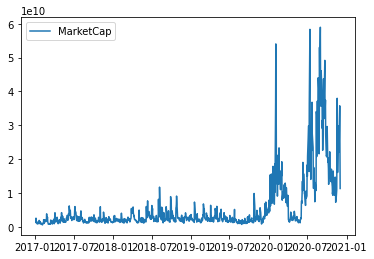

In [228]:

df = df.toPandas()
plt.plot(df['Date'],df['MarketCap'], label="MarketCap")
plt.legend()
plt.show()

# Bollinger Bands

In [264]:
df = df_MICROSOFT
#df = df_MICROSOFT.toPandas()

In [265]:
def bollinger_Bands(df):
  df = df.toPandas()
  df['middle_band'] = df['Close'].rolling(window=20).mean()
  df['upper_band'] = df['Close'].rolling(window=20).mean() + df['Close'].rolling(window=20).std()*2
  df['lower_band'] = df['Close'].rolling(window=20).mean() - df['Close'].rolling(window=20).std()*2
  
  return df

In [266]:
df = bollinger_Bands(df)

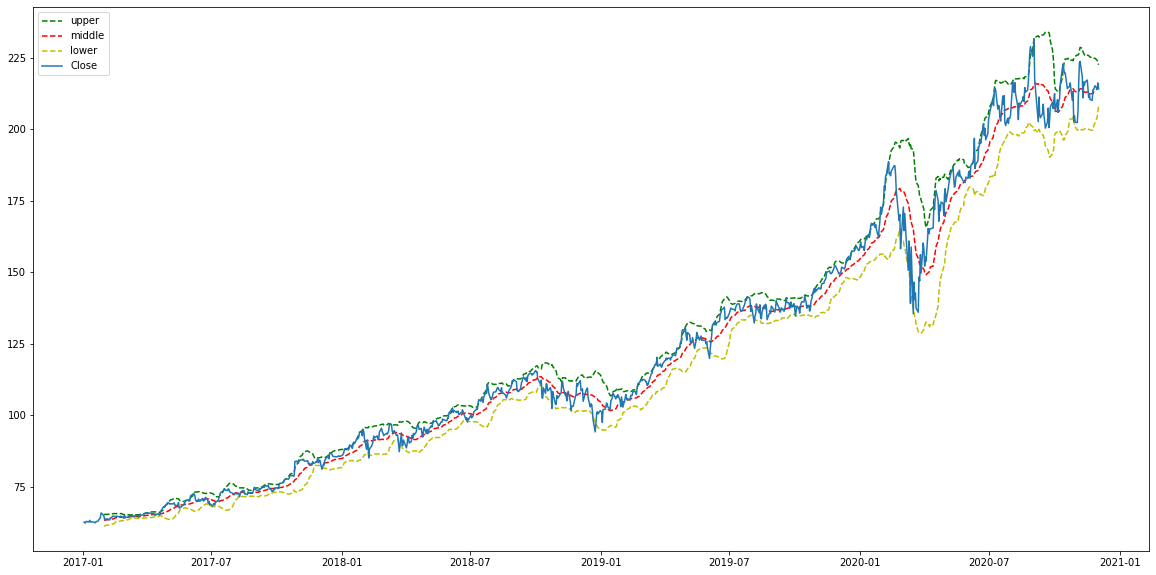

In [267]:

plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['upper_band'], 'g--', label="upper")
plt.plot(df['Date'],df['middle_band'], 'r--', label="middle")
plt.plot(df['Date'],df['lower_band'], 'y--', label="lower")
plt.plot(df['Date'],df['Close'], label="Close")
plt.legend()
plt.show()

# Kijun-sen

In [410]:
import pandas as pd
from pandas_datareader import data, wb
import matplotlib as mpl
import matplotlib.dates as dates
import datetime
import matplotlib.pyplot as plt


import databricks.koalas as ks
ks.set_option('compute.ops_on_diff_frames', True)

Also called the Base line, the Kijun-sen line is used for medium-term support or resistance level. A straight line is an indication of a flat market and thus prices crossing a straight line should not be interpreted as a trading signal, however, if prices cross a trending line, a trading signal is generated. Also, a flat Kijun-sen line can act as a price-magnet. The formula of the line is:




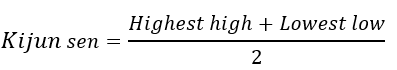

The formula is for the last 26 periods, hence the highest highs and lowest lows of the last 26 periods. It can be used in the following ways:
* When the market price crosses above the Kijun-sen, it is considered as a bullish signal.
* When the market price crosses below the Kijun-sen, it is considered as a bearish signal.

In [431]:
def kijun_sen(d):
    
  d = d.to_koalas()
  d = d.sort_index()
  # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
  period26_high = d['High'].rolling(window=26).max()
  period26_low = d['Low'].rolling(window=26).min()
  d['kijun_sen'] = (period26_high + period26_low) / 2

  
  #plt.plot(d['Close'], color = 'black', label = 'Close')
  #plt.plot(d['kijun_sen'], color = 'red', label = 'Tenkan-Sen')
  #plt.grid()
  #plt.legend()
  d = d.sort_index()
  return   d

In [432]:
d = df_MICROSOFT
d = kijun_sen(d)

In [433]:
d

,Date,High,Low,Open,Close,Volume,Adj Close,company_name,kijun_sen
0,2017-01-03,62.840000,62.130001,62.790001,62.580002,20694100.0,58.673244,MICROSOFT,NaN
1,2017-01-04,62.750000,62.119999,62.480000,62.299999,21340000.0,58.410725,MICROSOFT,NaN
2,2017-01-05,62.660000,62.029999,62.189999,62.299999,24876000.0,58.410725,MICROSOFT,NaN
3,2017-01-06,63.150002,62.040001,62.299999,62.840000,19922900.0,58.917015,MICROSOFT,NaN
4,2017-01-09,63.080002,62.540001,62.759998,62.639999,20382700.0,58.729496,MICROSOFT,NaN
5,2017-01-10,63.070000,62.279999,62.730000,62.619999,18593000.0,58.710747,MICROSOFT,NaN
6,2017-01-11,63.230000,62.430000,62.610001,63.189999,21517300.0,59.245159,MICROSOFT,NaN
7,2017-01-12,63.400002,61.950001,63.060001,62.610001,20968200.0,58.701370,MICROSOFT,NaN
8,2017-01-13,62.869999,62.349998,62.619999,62.700001,19422300.0,58.785755,MICROSOFT,NaN
9,2017-01-17,62.700001,62.029999,62.680000,62.529999,20664000.0,58.626369,MICROSOFT,NaN


/usr/local/lib/python3.7/dist-packages/databricks/koalas/indexes/base.py:531: UserWarning: We recommend using `Int64Index.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.7/dist-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


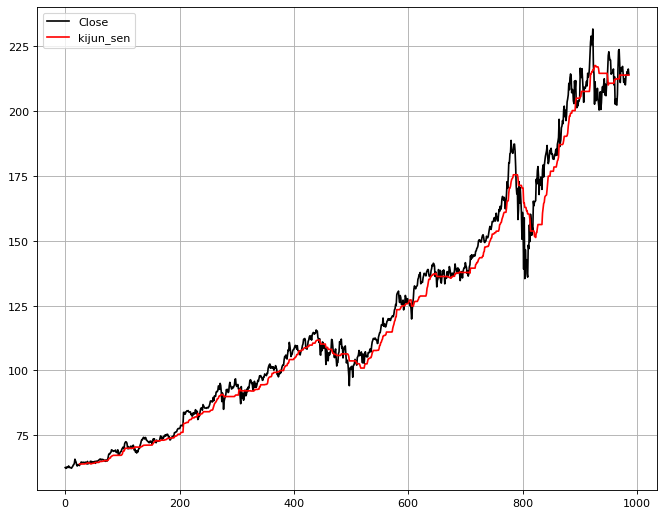

In [434]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(d['Close'], color = 'black', label = 'Close')
plt.plot(d['kijun_sen'], color = 'red', label = 'kijun_sen')
plt.grid()
plt.legend()

# Tenkan-sen

Also called the Conversion line, this line is the same as the previous one, only it takes the last 9 days (or periods) of the past.


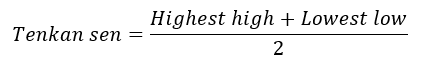

It can be used to find short-term support and resistance zones and it is conveniently used with the Kijun-sen line for crosses. In ranging markets, we can see many fake signals and hence it is better to seek out crosses in trending markets. It can be used in the following ways:
* When the market price crosses above the Tenkan-sen, it is considered as a bullish signal.
* When the market price crosses below the Tenkan-sen, it is considered as a bearish signal.

In [435]:
def tenkan_sen(d):
    

  # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
  nine_period_high = d['High'].rolling(window= 9).max()
  nine_period_low = d['Low'].rolling(window= 9).min()
  d['tenkan_sen'] = (nine_period_high + nine_period_low) /2

  d = d.sort_index()
  #plt.plot(d['Close'], color = 'black', label = 'Close')
  #plt.plot(d['tenkan_sen'], color = 'red', label = 'Tenkan-Sen')
  #plt.grid()
  #plt.legend()
  return d

In [436]:

d = tenkan_sen(d)

/usr/local/lib/python3.7/dist-packages/databricks/koalas/indexes/base.py:531: UserWarning: We recommend using `Int64Index.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.7/dist-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


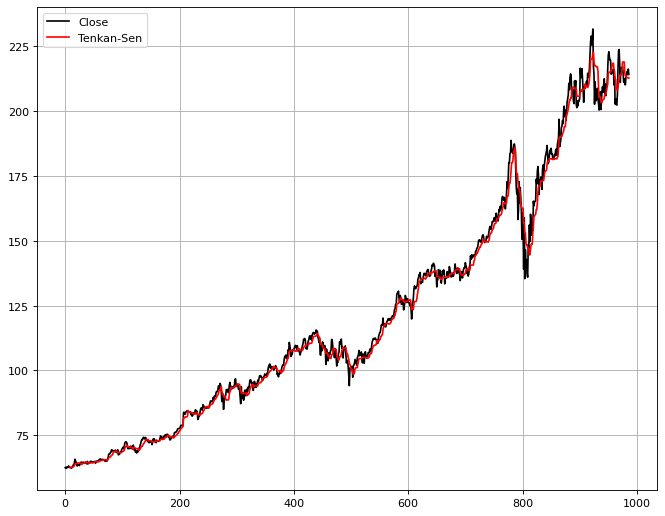

In [437]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(d['Close'], color = 'black', label = 'Close')
plt.plot(d['tenkan_sen'], color = 'red', label = 'Tenkan-Sen')
plt.grid()
plt.legend()

# Chikou-span

Also called the Lagging line, Chikou-span is the lagging indicator in the Ichimoku system. It is simply the price today projected back 26 periods. It only uses the closing price. Although its lagging nature, the Chikou-span is a good confirmation signal. It can be used in the following ways:
* When Chikou-span crosses above the market price, a bullish confirmation signal is generated.
* When Chikou-span crosses below the market price, a bearish confirmation signal is generated.

In [438]:
def Chikou_span(d):
  # The most current closing price plotted 26 time periods behind (optional)
  d['chikou_span'] = d['Close'].shift(-26)

  d = d.sort_index()
  #plt.plot(d['Close'], color = 'black', label = 'Close')
 #plt.plot(d['chikou_span'], color = 'red', label = 'chikou_span')
  #plt.grid()
  #plt.legend()
  return d

In [439]:

d = Chikou_span(d)

/usr/local/lib/python3.7/dist-packages/databricks/koalas/indexes/base.py:531: UserWarning: We recommend using `Int64Index.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.7/dist-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


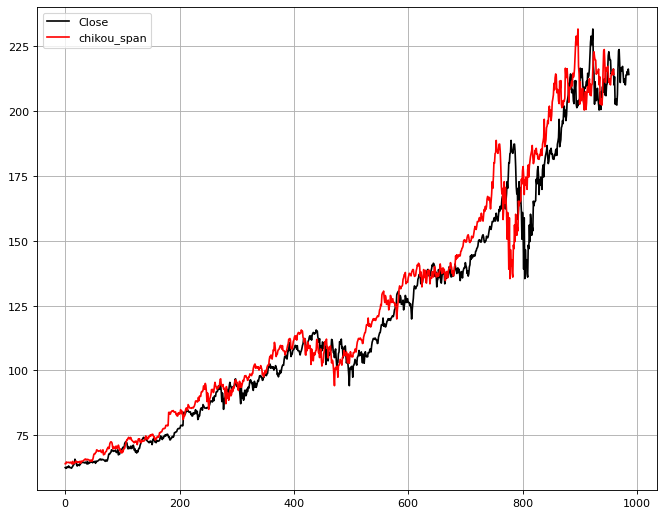

In [440]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(d['Close'], color = 'black', label = 'Close')
plt.plot(d['chikou_span'], color = 'red', label = 'chikou_span')
plt.grid()
plt.legend()

# Ichimoku Cloud

In the beautiful Japanese language, a cloud is referred to as Kumo, just as this part of the system. The true innovation of the whole Ichimoku system is the cloud. It is composed of two lines or envelopes and the cloud is the area between them. We will use that area as a support and resistance zone and the usefulness here lies in the fact that it is plotted 26 periods ahead (as opposed to the Chikou-span which is plotted 26 periods in the past). The two lines that form the cloud are called Senkou span A and Senkou span B. The formulas for both lines are pretty simple:

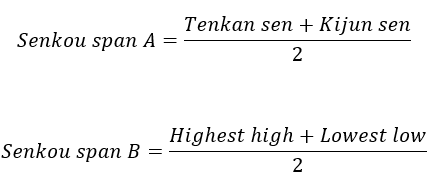

For the Senkou span B, the highest high and lowest low are calculated for the past 52 periods and just as the Senkou span A, it is projected 26 days into the future, so that the Ichimoku cloud is always leading the prices by 26 periods (or days if you are using a daily chart). Larger volatility forms larger clouds (denser) and they tend to be stronger when they are large as opposed to being thin. The trend is considered bullish when Senkou span A is above Senkou span B and the opposite is true.


The angle is also helpful with determining the strength of the cloud. Steeper angles reinforce the conviction. Some rules of thumb regarding the Ichimoku trading system is that it is not recommended to initiate shorts above the cloud and to initiate longs below the cloud. When a breakout occurs with a thick cloud, it can be inferred that the trend has reversed. Another way of determining the reversal or stability of the trend is by monitoring the levels of the Senkou span A and Senkou span B, if they switch (which is 26 periods ahead), a new trend may commence. Now it is time to back-test the Ichimoku Kinko Hyo system.


In [441]:
def senkou_span(d):
  d=kijun_sen(d)
  d = d.sort_index()
  d=tenkan_sen(d)
  d = d.sort_index()
  d=Chikou_span(d)
  d = d.sort_index()
  # Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
  d['senkou_span_a'] = ((d['tenkan_sen'] + d['kijun_sen']) / 2).shift(26)
  
  d = d.sort_index()
  # Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
  period52_high = d['High'].rolling(window=52).max()
  
  d = d.sort_index()
  period52_low = d['Low'].rolling(window=52).min()
  
  d = d.sort_index()
  d['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)
  
  d = d.sort_index()



  return d

In [442]:
d=df_MICROSOFT
d = senkou_span(d)

/usr/local/lib/python3.7/dist-packages/databricks/koalas/indexes/base.py:531: UserWarning: We recommend using `Int64Index.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.7/dist-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


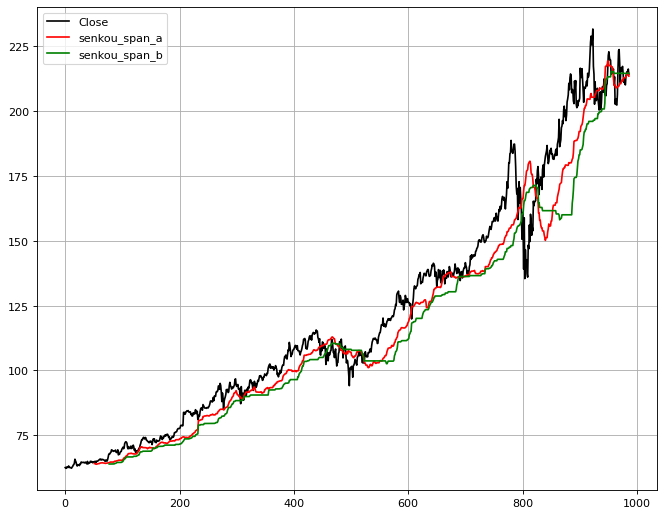

In [443]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(d['Close'], color = 'black', label = 'Close')
plt.plot(d['senkou_span_a'], color = 'red', label = 'senkou_span_a')
plt.plot(d['senkou_span_b'], color = 'green', label = 'senkou_span_b')

plt.grid()
plt.legend()